# Violation of Baccari et al.'s Bell inequality for path graphs from size 2 to 57 on IBM Quantum Brooklyn

In [1]:
import sys
import time
import numpy as np
import pickle

In [2]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)
with open("./pkls/lnp_hist_list.pkl", "rb") as f:
    lnp_hist_list = pickle.load(f)

In [3]:
sys.path.append("../../libs_bell/")
n = 92
from lib_graph_states import adjacency_list_for_cycle_graph, list_to_matrix
F_list = [3 * i + 1 for i in range(n // 3)] 
adj_list = adjacency_list_for_cycle_graph(n) 
graph = list_to_matrix(adj_list) 
print("n:", n)
print("F_list:", F_list)
print(len(F_list))

n: 92
F_list: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88]
30


In [4]:
from lib_cycle_graphs import *

In [5]:
def corr(n, adj_list, F, hist_list, silent=True):
    F = F_list

    # XZXZXZXZ
    hist_xz = hist_list[0]
    # ZXZXZXZX
    hist_zx = hist_list[1]

    Es_F, Ds_F, corr_F = [], [], 0
    remaining = remaining_vertices(adj_list, n, F)

    for m in F:
        hist, poses = extract_sub_hist(hist_xz, hist_zx, m, n)
        corr_itself, stddev_itself = mit.expectation_value(hist, qubits=poses, clbits=poses, meas_mitigator=None)
        corr_deg = corr_itself * len(adj_list[m])
        Es_m, Ds_m = [corr_itself], [stddev_itself * len(adj_list[m])]
        for j, _ in enumerate(adj_list[m]):
            hist, poses = extract_sub_hist(hist_xz, hist_zx, j, n)
            expval, stddev = mit.expectation_value(hist, qubits=poses, clbits=poses, meas_mitigator=None)
            Es_m.append(expval)
            Ds_m.append(stddev)
        sum_corr = corr_deg + sum(Es_m[1:])
        if not silent:
            print("correlation on n[", m, "]:", sum_corr)
        corr_F += sum_corr
        Es_F.append(Es_m)
        Ds_F.append(Ds_m)
        
    # remainig part
    Es_R, Ds_R = [], []
    for i, _ in enumerate(remaining):
        hist, poses = extract_sub_hist(hist_xz, hist_zx, i, n)
        expval, stddev = mit.expectation_value(hist, qubits=poses, clbits=poses, meas_mitigator=None)
        Es_R.append(expval)
        Ds_R.append(stddev)
    corr_R = sum(Es_R)
    if not silent:
        print("correlation on remaining vertices:", corr_R)

    corr_F *= np.sqrt(2)
    corr_all = corr_F + corr_R
    stddev_all = np.sqrt(2 * sum([dev ** 2 for Ds_m in Ds_F for dev in Ds_m]) + sum([dev ** 2 for dev in Ds_R]))
    print("total correlation:", corr_all, "\n")
    return corr_all, stddev_all

In [6]:
corr, stddev = corr(n, adj_list, F_list, raw_hist_list, silent=False)

correlation on n[ 1 ]: 0.171875
correlation on n[ 4 ]: 0.12890625
correlation on n[ 7 ]: 0.19921875
correlation on n[ 10 ]: 0.0859375
correlation on n[ 13 ]: 0.00390625
correlation on n[ 16 ]: 0.09375
correlation on n[ 19 ]: 0.15234375
correlation on n[ 22 ]: -0.03515625
correlation on n[ 25 ]: 0.1875
correlation on n[ 28 ]: 0.0390625
correlation on n[ 31 ]: 0.171875
correlation on n[ 34 ]: 0.0390625
correlation on n[ 37 ]: 0.109375
correlation on n[ 40 ]: 0.18359375
correlation on n[ 43 ]: 0.12890625
correlation on n[ 46 ]: 0.10546875
correlation on n[ 49 ]: 0.1328125
correlation on n[ 52 ]: 0.015625
correlation on n[ 55 ]: 0.1796875
correlation on n[ 58 ]: 0.1484375
correlation on n[ 61 ]: 0.078125
correlation on n[ 64 ]: 0.05078125
correlation on n[ 67 ]: 0.1953125
correlation on n[ 70 ]: 0.19921875
correlation on n[ 73 ]: 0.09375
correlation on n[ 76 ]: 0.1796875
correlation on n[ 79 ]: 0.19140625
correlation on n[ 82 ]: 0.1953125
correlation on n[ 85 ]: 0.1328125
correlation on n[

In [7]:
stddev

0.5939988066728723

In [9]:
lnp_corr_list, lnp_stddev_list, lnp_Es_list, lnp_Ds_list = correlations_of_path_graphs(adj_lists, Fs, lnp_hist_list)

graph size: 1
skipped

graph size: 2
total correlation: 2.7421815383619115 

graph size: 3
total correlation: 5.193380155350603 

graph size: 4
total correlation: 5.927179828183757 

graph size: 5
total correlation: 7.829548153113651 

graph size: 6
total correlation: 10.827095957908934 

graph size: 7
total correlation: 11.59065920859387 

graph size: 8
total correlation: 13.072222245601107 

graph size: 9
total correlation: 15.995154363185733 

graph size: 10
total correlation: 17.092078534180708 

graph size: 11
total correlation: 18.47050484866469 

graph size: 12
total correlation: 21.04888700285788 

graph size: 13
total correlation: 22.23931641570373 

graph size: 14
total correlation: 23.707940280565815 

graph size: 15
total correlation: 26.380796668874474 

graph size: 16
total correlation: 27.42065274674359 

graph size: 17
total correlation: 28.76619732666295 

graph size: 18
total correlation: 31.20315871512984 

graph size: 19
total correlation: 31.72734092768184 

graph 

## plot correlations

In [17]:
c_bounds = [0] + [n + (n // 3) for n in range(2, n + 1)]
q_bounds = [0]
for n in range(2, n + 1):
    q_bounds.append( 2 * (np.sqrt(2) * 2 - 1) * (n // 3) + n - ((n + 1) // 3))
    if (n + 1) % 3 == 0:
        q_bounds[-1] += (np.sqrt(2) * 2 - 1)

In [18]:
from lib_plots import plot_correlations_lines, cut_corrs_list

In [19]:
corrs_list = [np.array(corr_list), 
              np.array(ignis_corr_list),
              np.array(delta_corr_list),
              np.array(lnp_corr_list),
              np.array(mooney01_corr_list),
              np.array(nation_corr_list)]
stddevs_list = [np.array(stddev_list),
                np.array(ignis_stddev_list),
                np.array(delta_stddev_list),
                np.array(lnp_stddev_list),
                np.array(mooney01_stddev_list),
                np.array(nation_stddev_list)]

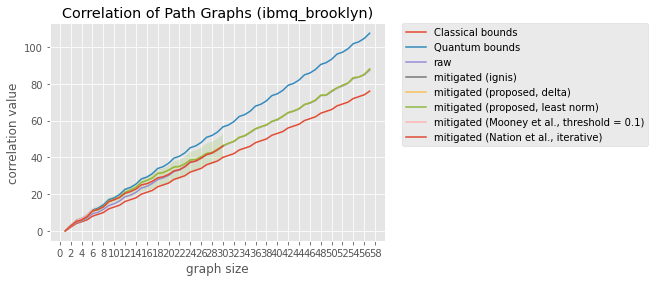

In [20]:
plot_correlations_lines(n, 
                        c_bounds, 
                        q_bounds, 
                        corrs_list,
                        stddevs_list,
                        ["raw", 
                         "mitigated (ignis)", 
                         "mitigated (proposed, delta)", 
                         "mitigated (proposed, least norm)", 
                         "mitigated (Mooney et al., threshold = 0.1)",
                         "mitigated (Nation et al., iterative)"], 
                        # ["*", "*", "*", "*", "*", "*"], 
                        "Correlation of Path Graphs (ibmq_brooklyn)")

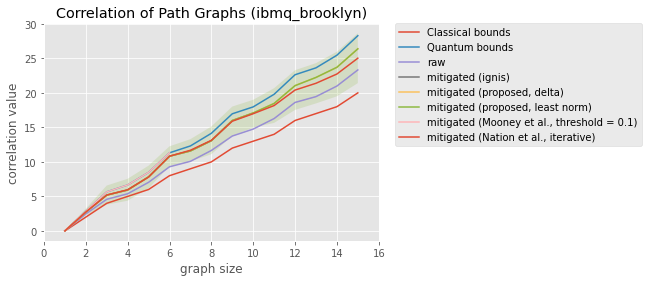

In [21]:
plot_correlations_lines(15,
                        c_bounds[:15],
                        q_bounds[:15],
                        cut_corrs_list(corrs_list, 15),
                        cut_corrs_list(stddevs_list, 15),
                        ["raw", 
                         "mitigated (ignis)", 
                         "mitigated (proposed, delta)", 
                         "mitigated (proposed, least norm)", 
                         "mitigated (Mooney et al., threshold = 0.1)",
                         "mitigated (Nation et al., iterative)"], 
                        # ["*", "*", "*", "*", "*", "*"], 
                        "Correlation of Path Graphs (ibmq_brooklyn)")

In [22]:
with open("./pkls/corrs_stddevs_list.pkl", "wb") as f:
    pickle.dump([corrs_list, stddevs_list], f)

In [23]:
corrs_list = [np.array(corr_list), 
              # np.array(ignis_corr_list),
              # np.array(delta_corr_list),
              np.array(lnp_corr_list),
              # np.array(mooney01_corr_list),
              # np.array(nation_corr_list),
             ]
stddevs_list = [np.array(stddev_list),
                # np.array(ignis_stddev_list),
                # np.array(delta_stddev_list),
                np.array(lnp_stddev_list),
                # np.array(mooney01_stddev_list),
                # np.array(nation_stddev_list),
               ]

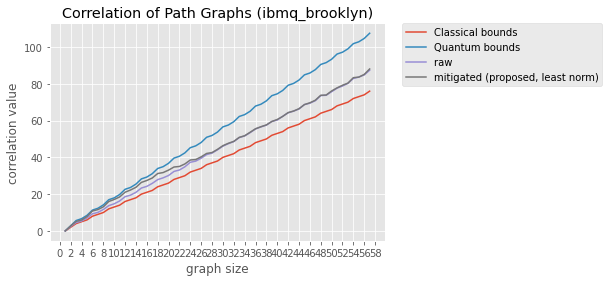

In [24]:
plot_correlations_lines(n, 
                        c_bounds, 
                        q_bounds, 
                        corrs_list,
                        stddevs_list,
                        ["raw ", 
                         # "mitigated (ignis)", 
                         # "mitigated (proposed, delta)", 
                         "mitigated (proposed, least norm)", 
                         # "mitigated (Mooney et al., threshold = 0.1)", 
                         # "mitigated (Nation et al., iterative)",
                        ], 
                        # ["*", "*", "*", "*", "*", "*"], 
                        "Correlation of Path Graphs (ibmq_brooklyn)")